***Exercise 1***

Fit the given data, using linear, quadratic and cubic fits. Find the best fit using Standard Error function.
Plot the results. 

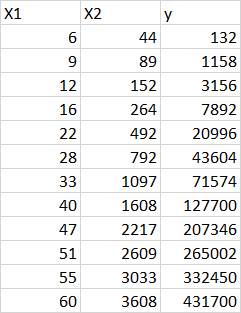

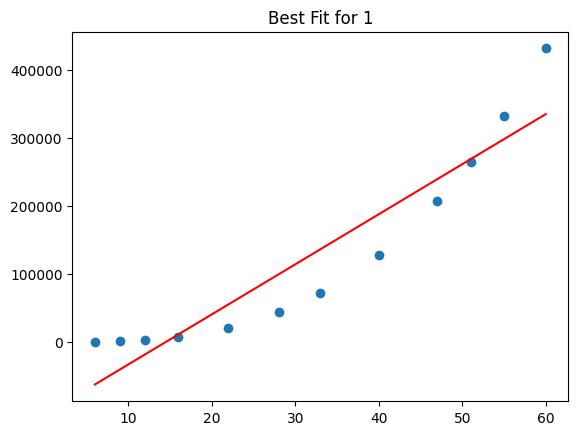

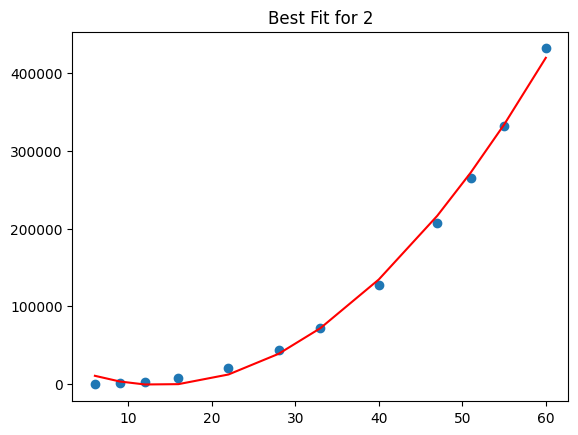

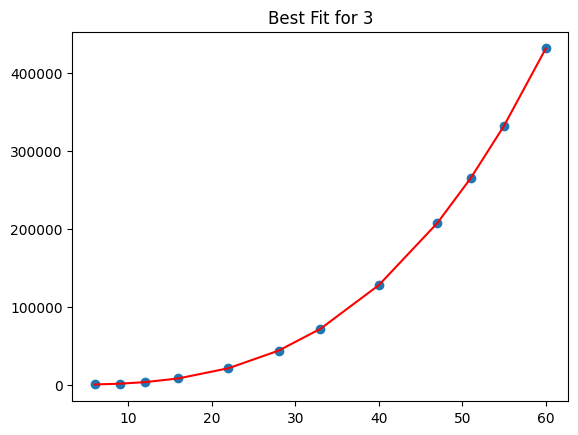

[{'Deg': 1, 'MSE': 2480683974.067151, 'R2': 0.8605658954255673}, {'Deg': 2, 'MSE': 51029877.82421297, 'R2': 0.9974763593869534}, {'Deg': 3, 'MSE': 3.824239340972344e-21, 'R2': 1.0}]


In [27]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error,r2_score
# # from ace_tools import display_dataframe_to_user

# X1 = np.array([6, 9, 12, 16, 22, 28, 33, 40, 47, 51, 55, 60])
# y = np.array([132, 1158, 3156, 7892, 20996, 43604, 71574, 127700, 207346, 
#               265002, 332450, 431700])

# results=[]
# X_range = np.linspace(X1.min(), X1.max(), 300)

# for deg in [1,2,3]:
#     coeffs=np.polyfit(X1,y,deg)
#     y_pred=np.polyval(coeffs,X1)
#     rmse=np.sqrt(mean_squared_error(y,y_pred))
#     r2=r2_score(y,y_pred)
#     results.append({"Degree":deg,
#                     "RMSE":rmse,
#                     "R2":r2})
#     plt.plot(X1, y_pred, label=f'Degree {deg}')
#     plt.scatter(X1, y, color='red', label='Data points')
#     plt.title(f'Polynomial Regression (Degree {deg})')
#     plt.xlabel('X')
#     plt.ylabel('y')
#     plt.legend()
#     # plt.grid()
#     plt.show()

# print(results)
# ! pip install ace_tools

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np



X1 = np.array([6, 9, 12, 16, 22, 28, 33, 40, 47, 51, 55, 60])
X2=X1**2+8
y = np.array([132, 1158, 3156, 7892, 20996, 43604, 71574, 127700, 207346, 
              265002, 332450, 431700])


result=[]
for deg in [1,2,3]:
    coef=np.polyfit(X1,y,deg)
    y_pred=np.polyval(coef,X1)
    mse=mean_squared_error(y_pred,y)
    r2=r2_score(y_pred,y)
    result.append({
        "Deg":deg,
        "MSE":mse,
        "R2":r2
    })
    plt.scatter(X1,y)
    plt.plot(X1,y_pred,'r-')
    plt.title(f"Best Fit for {deg}")
    plt.show()

print(result)


***Exercise 2***

Consider X1 and Y from the above dataset. Implement Linear regression using least mean square error and gradient descent approach. Do not use any inbuilt function for these concepts. 

(12, 3)


[]

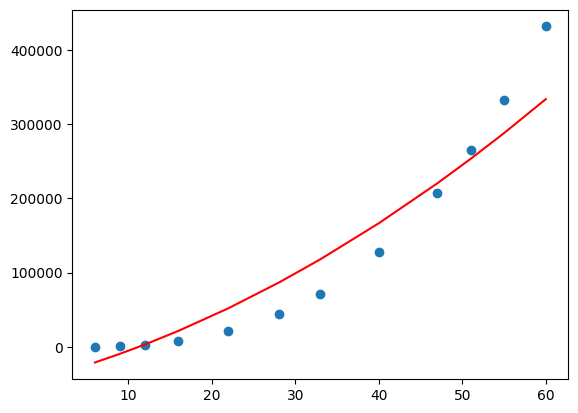

In [59]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# X1 = np.array([6, 9, 12, 16, 22, 28, 33, 40, 47, 51, 55, 60])
# y = np.array([132, 1158, 3156, 7892, 20996, 43604, 71574, 127700, 207346, 
#               265002, 332450, 431700])
# X2=X1**2 + 8

# X1_norm=(X1-np.mean(X1))/np.std(X1)
# X2_norm = (X2 - np.mean(X2)) / np.std(X2)
# y_norm = (y - np.mean(y)) / np.std(y)

# X=np.column_stack((np.ones_like(X1),X1_norm,X2_norm))
# print(X)

# theta=np.zeros(3)
# alpha=0.01
# epochs=5000
# m=y.shape[0]

# costs=[]
# for _ in range(epochs):
#     y_pred=X@theta
#     error=y_pred-y_norm
#     cost=np.sum(error**2)*(1/(2*m))
#     costs.append(cost)

#     gradient=X.T@error*(1/m)
#     theta-=alpha*gradient

# y_pred_final=X@theta
# y_pred_o=y_pred_final*np.std(y)+np.mean(y)

# plt.scatter(X1,y)
# plt.plot(X1,y_pred_o,'r-',linewidth=2)
# plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X1 = np.array([6, 9, 12, 16, 22, 28, 33, 40, 47, 51, 55, 60])
y = np.array([132, 1158, 3156, 7892, 20996, 43604, 71574, 127700, 207346, 
              265002, 332450, 431700])
X2=X1**2+8


X1_norm=(X1-np.mean(X1))/np.std(X1)
X2_norm=(X2-np.mean(X2))/np.std(X2)
y_norm=(y-np.mean(y))/np.std(y)

X=np.column_stack([np.ones_like(X1_norm),X1_norm,X2_norm])

print(X.shape)



w=np.zeros(X.shape[1])
eta=0.001

m=len(y_norm)
for i in range(1,1000):
    h=X@w
    gradients=(1/m)*X.T@(h-y_norm)
    w=w-eta*gradients
y_pred=X@w

y_pred=y_pred*np.std(y)+np.mean(y)


plt.scatter(X1,y)
plt.plot(X1,y_pred,'r-')
plt.plot()


***Exercise 3***

Use Housing Dataset (Ignore the Ocean Proximity column), consider median_house_value as the target variable (y).
Implement linear regression with Gradient Descent algorithm using suitable library functions. Evaluate the model using RMSE and R2 score. 

Help on class SGDRegressor in module sklearn.linear_model._stochastic_gradient:

class SGDRegressor(BaseSGDRegressor)
 |  SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
 |
 |  Linear model fitted by minimizing a regularized empirical loss with SGD.
 |
 |  SGD stands for Stochastic Gradient Descent: the gradient of the loss is
 |  estimated each sample at a time and the model is updated along the way with
 |  a decreasing strength schedule (aka learning rate).
 |
 |  The regularizer is a penalty added to the loss function that shrinks model
 |  parameters towards the zero vector using either the squared euclidean norm
 |  L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
 |  par

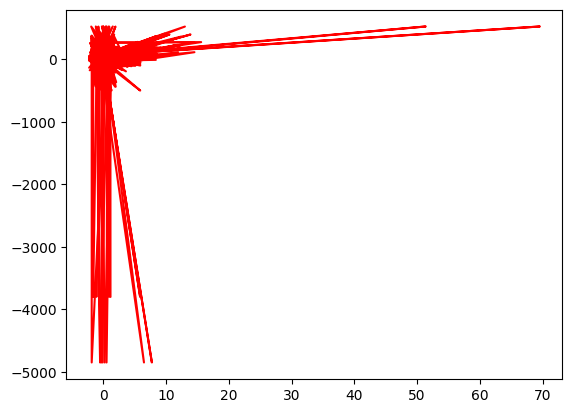

In [ ]:
# from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import SGDRegressor
# from sklearn.metrics import mean_squared_error,r2_score


# data=fetch_california_housing(as_frame=True)
# df=data.frame
# X=df.drop(columns=["MedHouseVal"])
# Y=df["MedHouseVal"]


# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# x_scaler = StandardScaler()
# X_train_scaled = x_scaler.fit_transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

# print(X_train.shape)
# # Scale Y separately
# # print(Y)
# print(Y_train.shape)
# Y_train=Y_train.values.reshape(-1,1)
# print(Y_train.shape)
# Y_test=Y_test.values.reshape(-1,1)
# y_scaler = StandardScaler()
# Y_train_scaled = y_scaler.fit_transform(Y_train).ravel()
# Y_test_scaled = y_scaler.transform(Y_test).ravel()

# model=SGDRegressor(max_iter=1000,learning_rate='invscaling',eta0=0.01,random_state=42)
# model.fit(X_train_scaled,Y_train_scaled)

# y_pred=model.predict(X_test_scaled)

# rmse=np.sqrt(mean_squared_error(Y_test_scaled,y_pred))
# r2=r2_score(Y_test_scaled,y_pred)

# print(f"RMSE:{rmse}")
# print(f"R2:{r2}")

# plt.scatter(Y_test_scaled,y_pred)
# plt.show()

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=fetch_california_housing(as_frame=True)
df=data.frame
X=df.drop(columns='MedHouseVal')
y=df['MedHouseVal'].to_numpy().reshape(-1,1)


xscaler=StandardScaler()
X_scaled=xscaler.fit_transform(X)
yscaler=StandardScaler()

y_scaled=yscaler.fit_transform(y).ravel()


X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

model=SGDRegressor(max_iter=1000,learning_rate='invscaling',eta0=0.01,random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# plt.scatter(X_test,y_pred)
plt.plot(X_test,y_pred,'r-')
plt.plot()

